### Imports

In [1]:
import numpy as np
import pandas as pd

### Dataset

In [2]:
df = pd.read_csv("../datasets/train_v2_drcat_02.csv")
print(df.shape)
print(df.head())

(44868, 5)
                                                text  label  \
0  Phones\n\nModern humans today are always on th...      0   
1  This essay will explain if drivers should or s...      0   
2  Driving while the use of cellular devices\n\nT...      0   
3  Phones & Driving\n\nDrivers should not be able...      0   
4  Cell Phone Operation While Driving\n\nThe abil...      0   

          prompt_name           source  RDizzl3_seven  
0  Phones and driving  persuade_corpus          False  
1  Phones and driving  persuade_corpus          False  
2  Phones and driving  persuade_corpus          False  
3  Phones and driving  persuade_corpus          False  
4  Phones and driving  persuade_corpus          False  


In [4]:
persuade_df = df[df.source == "persuade_corpus"]
persuade_seven_df = persuade_df[persuade_df.RDizzl3_seven == True]
print(persuade_seven_df.shape)
print(persuade_seven_df.head())
# save to csv
# persuade_df.to_csv("../datasets/persuade.csv", index=False)

(12875, 5)
                                                   text  label  \
1168  Cars have been around for awhile and they have...      0   
1169  Have you ever thought what it would be like no...      0   
1170  What you are about to read is going to give yo...      0   
1171  cars have many flaws nd and in this day and ag...      0   
1172  There are many advantages of limiting car usag...      0   

          prompt_name           source  RDizzl3_seven  
1168  Car-free cities  persuade_corpus           True  
1169  Car-free cities  persuade_corpus           True  
1170  Car-free cities  persuade_corpus           True  
1171  Car-free cities  persuade_corpus           True  
1172  Car-free cities  persuade_corpus           True  


In [5]:
new_df = persuade_df[persuade_df.RDizzl3_seven == True]
new_df["length"] = new_df["text"].apply(len)
print(new_df["length"].describe())

count    12875.000000
mean      2092.562796
std        948.981783
min        712.000000
25%       1390.000000
50%       1935.000000
75%       2576.500000
max      18322.000000
Name: length, dtype: float64


C:\Users\Tailen\AppData\Local\Temp\ipykernel_28464\793645781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["length"] = new_df["text"].apply(len)


2.2226205341803897 700 626.5409568125061


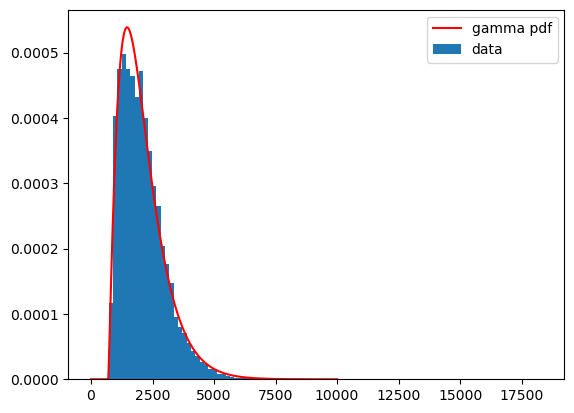

In [6]:
# Fit a Gamma distribution to the length of essay
# Then overlay the fitted distribution on a histogram of the data from 0 to 10000
import scipy.stats as stats
import matplotlib.pyplot as plt

a, loc, scale = stats.gamma.fit(new_df["length"], floc=700)
print(a, loc, scale)
x = np.linspace(0, 10000, 1000)
y = stats.gamma.pdf(x, a, loc, scale)
plt.plot(x, y, label="gamma pdf", color="red")
plt.hist(new_df["length"], bins=100, density=True, label="data")
plt.legend()
plt.show()

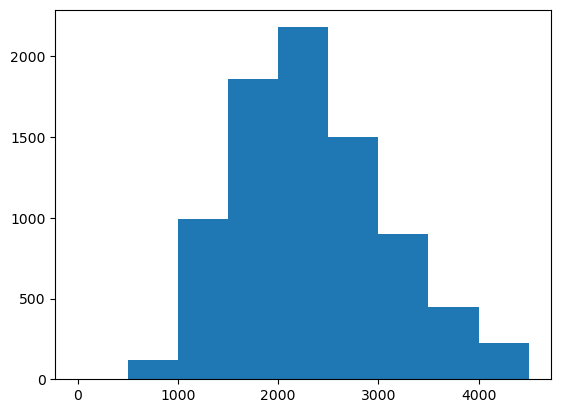

In [7]:
# Plot hidden test set histogram
bins = [250, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250]
values = [0, 120, 990, 1860, 2180, 1500, 900, 450, 225]
plt.bar(bins, values, width=500)
plt.show()

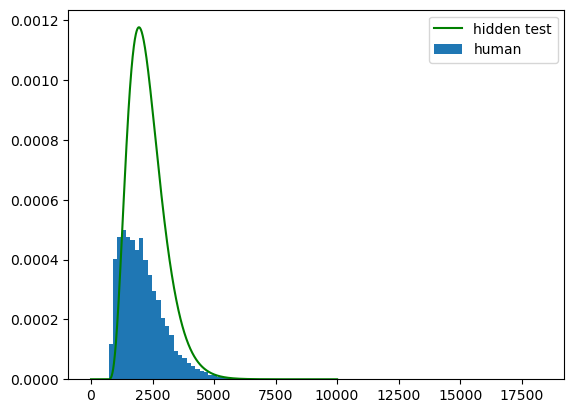

In [8]:
# Calculate the test set Gamma distribution parameters
test_mean = 2300
test_std = 750
test_loc = 700
test_scale = test_std * test_std / (test_mean - test_loc)
test_a = (test_mean - test_loc) / test_scale

# Overlay the test set Gamma distribution on the training set histogram
x = np.linspace(0, 10000, 1000)
y = stats.gamma.pdf(x, test_a, test_loc, test_scale)
plt.plot(x, 2*y, label="hidden test", color="green")
plt.hist(new_df["length"], bins=100, density=True, label="human")
plt.legend()
plt.show()

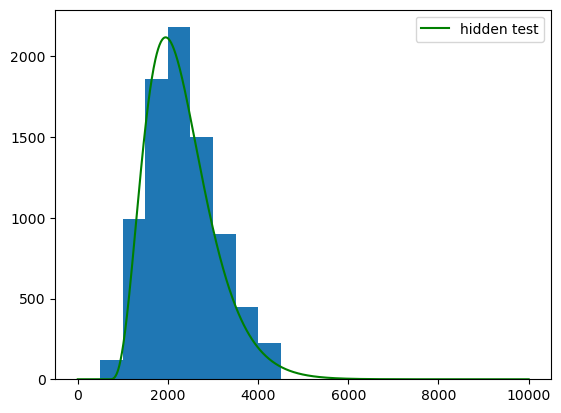

In [9]:
# Scale the hidden test set Gamma distribution to overlay on the bar chart
plt.bar(bins, values, width=500)
plt.plot(x, 3600000*y, label="hidden test", color="green")
plt.legend()
plt.show()

In [10]:
# Add a normal distribution to the train distribution
sum = stats.gamma.pdf(x, a, loc, scale) + stats.norm.pdf(x, test_mean, 450)
# Calculate the new standard deviation
new_std = np.sqrt(np.sum((x - test_mean) ** 2 * sum) / np.sum(sum))
print(new_std)

747.4504507244515


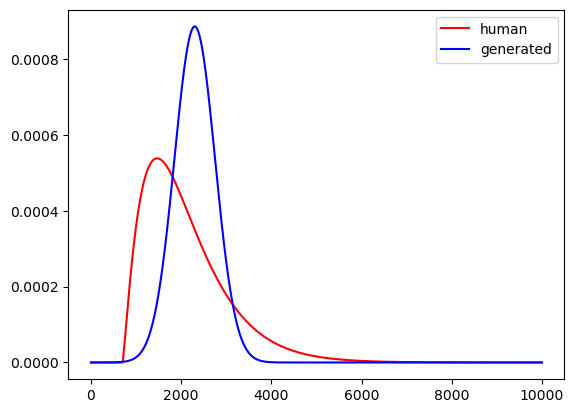

In [11]:
# Plot the train Gamma distribution and the normal distribution
plt.plot(x, stats.gamma.pdf(x, a, loc, scale), label="human", color="red")
plt.plot(x, stats.norm.pdf(x, test_mean, 450), label="generated", color="blue")
plt.legend()
plt.show()

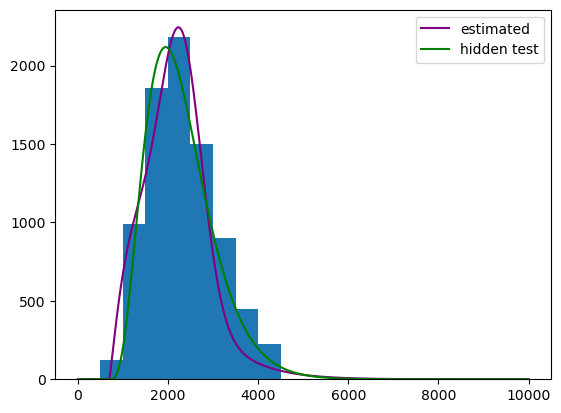

: 

In [12]:
# Compare estimated distribution with the test set distribution
plt.bar(bins, values, width=500)
plt.plot(x, 3600000 * sum / 2, label="estimated", color="purple")
plt.plot(
    x,
    3600000 * stats.gamma.pdf(x, test_a, test_loc, test_scale),
    label="hidden test",
    color="green",
)
plt.legend()
plt.show()

### Estimated AI-generated Essay Char-Length Distribution
mean = 2300, std = 450